In [26]:
import pandas as pd

df = pd.read_json("013_segments_matched.jsonl", orient="records", lines=True)
df.head()

,file,start,end,text,asr_transcription,ratio,webpage_transcript
0,audio/00DtyZ2sCUM.wav,12.0,27.5,upreko s pričama da srbiji ide sve bolje izgleda da građani to ne osjećaju na svojoj koži o tome koliko su pohvale na račun ekonomije u srbiji realne razgovaramo sa redovnim profesorom ekonomskog fakulteta u nišu boamstejanovićem dobrodošli profesore,,,
1,audio/00DtyZ2sCUM.wav,27.5,43.4,kada su mediji nedavno prenijeli informaciju gradske uprave za privredu da industrijska proizvodnja unišu beleži konstantni rast ova vezije sudeći bar prema komentarima na društvenim mrežama nasmijela mnoge građane koliko je ta statistika realna,,,
2,audio/00DtyZ2sCUM.wav,43.5,65.0,pa kažu da statistika kao i bikini otkriva pokazuje sve a ne otkriva ono ključno radi se o metodologiji najvjerojatnije obračuna određenih veličina problematično je recimo podatak da pada nezaposlenost na 16 sa 24 je ogroman pad i bilo bi dobro da je tako,,,
3,audio/00DtyZ2sCUM.wav,65.0,79.5,ali mnogi naravno i analitičari izražavaju sumnju u takav način dolaženja do podataka ali najvjerojatnije se radi o metodologiji promijenjenoj po kojoj je to moguće ja isto mislim da izražam sumnju i skeptiksa mislim,,,
4,audio/00DtyZ2sCUM.wav,79.5,97.2,očigledno nam porastu društvenog bruto proizvoda po svim drugim podacima situacija nije takva a kada govorimo i o statistici i o zapošljavanju ukoliko podatak da 64 h0d ljudi unišu radi koliko je on dobar povoljan ili nepovoljan za grad veličineniše,,,


<AxesSubplot:ylabel='Frequency'>

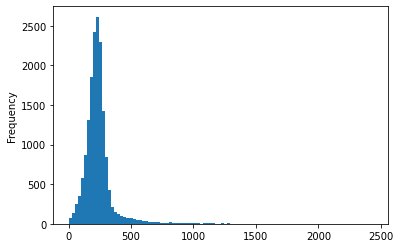

In [27]:
df.text.dropna().apply(len).plot.hist(bins=100)

In [28]:
df.asr_transcription.describe()

count     16747
unique    16528
top            
freq        214
Name: asr_transcription, dtype: object

In [37]:
(df.asr_transcription=="").sum()/df.shape[0]

0.012778408073087718

In [30]:
c_empty_asr = df.asr_transcription==""

df[~c_empty_asr].file.unique().shape[0]

289

# Implementing filtering

In [35]:
c_empty_asr = df.asr_transcription==""
c_empty_text = df.text.isna()


final_df = df[(~c_empty_asr) & (~c_empty_text)].reset_index(drop=True)
final_df["webpage_transcript"] = final_df.webpage_transcript.str.replace("JV:", "")
final_df.file.unique().shape[0]

289

In [36]:
final_df["file	start	end	 asr_transcription	webpage_transcript ratio".split()].to_json("014_filtered_df.json", orient="records", lines=True)

In [41]:
pd.set_option('max_colwidth', 1000)
final_df["file	start	end	 asr_transcription	webpage_transcript ratio".split()]

,file,start,end,asr_transcription,webpage_transcript,ratio
0,audio/58xZSVbpgkk.wav,12.0,31.0,nekoliko puta smo ponavljali da nišo od uvođenja više stranačja nije ni kad imao veći broj narodnih poslanika u skupštini srbiji razgovaramo sa slavoljebom vlajkovićem poslanikom socijalistički partije srbije gospodine vlajkoviću kakav je vaš utesak da li je niž iskoristio to što ili koristi to što ima 12 poslanika,"Nekoliko puta smo ponavljali da Niš od uvođenja višestranačja nijenikada imao veći broj poslanika u Skupštini Srbije. Razgovaramo sa Slavoljubom Vlajkovićem, narodnim poslanikom Socijalističke partije Srbije. Gospodine Vlajkoviću, kakav je vaš utisak, da li je Niš iskoristio to što ili koristi to što ima 12 poslanika -",0.757895
1,audio/58xZSVbpgkk.wav,31.0,47.0,nikad više pa niti iskoristio niti će izgledati iskoristi tu priliku što mislim da je to pa problem je u nama mislim da je problem u gradu a nije problem u narodnim a mi jeste prestavo u svojo stranke i mi nismo bjereni kao lica mi smo ispred svojih stranaka iz,"- nikad više?’ Niti je iskoristio, niti će izgleda iskoristi priliku. Mislim da je to.. Šta je problem? Pa problem je u nama! Mislim da je problem u gradu, nije problem u narodnim poslanicima! Mi, jeste, predstavljamo svoje stranke! Mi nismo birani kao lica, mi smo ispred svojih stranaka",0.78
2,audio/58xZSVbpgkk.wav,47.0,62.5,dobrani i znate da e svaka stranka od polih predloži 200 kandidata slučaj tako te o da smo svi bili na tim visokim brojevima da smo ušli u parlament ali mislim da je problem narodnih poslavnika ovdje u gradu,"Vi znate da svaka stranka otprilike predloži 250 kandidata . Slučaj je tako hteo da smo svi bili na tim visokim brojevima, da smo ušli u parlament. Ali mislim da je problem narodnih poslanika ovde u gradu!",0.773333
3,audio/58xZSVbpgkk.wav,62.5,82.1,znači grad uopštenije organizvan i mi faktički u gradu nemamo i jednu jedinu zajedničku želju koju bi trebali da pokušamo bar da rješimo i da skupštini iskoristimo za bolji niš i za bolje sud ta je problem zbog čega vi nemožete se a jesam,"gradu! Znači, grad uopšte nije organizovan i mi faktički u gradu nemamo ni jednu jedinu zajedničku želju koju bi trebalo da pokušamo bar da rešimo i da Skupštinu iskoristimo za bolji Niš i za bolje sutra. Ali šta je problem? Zbog čega vi ne možete da se",0.725275
4,audio/58xZSVbpgkk.wav,82.1,98.4,pa iima ali ja kažem da bi trebao grada kažem is to ja mogu individualno tako e socijalistička partije srvi ima najveći broj poslonika tu ste i zrano radovanović ivana dinić pa što se tiče nas kao socijaliste mislim da to radimo perfektno,"ja jesam... Pa ima, ali ja kažem da bi trebalo grad da kaže, nisu to.. Ja mogu individualno, ali tako mogu u ime svoje partije... Ali vi imate, Socijalistička partija ima najveći broj poslanika: tu ste vi, Zoran Radovanović i Ivana Dinić. Tako je! Pa, što se tiče nas socijalista, mislim da to",0.604167
...,...,...,...,...,...,...
16528,audio/fTfyE4ZdZqY.wav,1139.2,1144.6,poziciju povrenika ako hoćete da se kandidute za gradonačelnika beograda,bio najobičniji politikanski trik. Saša Janković je bio u potpuno drugoj,0.8
16529,audio/fTfyE4ZdZqY.wav,1144.6,1170.2,slične su poruke bile upućivane i tadašnjem ombusmanu s bio naobični politikanski tri saš jedan koji je bio u potpuno ruši poziciji i kada je najavio političku emdaturu podnaju ostavku dakle ja sam onaj iz meni potpuno nerazumljivih razloga politikantskig razloga dakle iskoristila moj odgovor na pitanje novinaru da li je bilo sugestije prijedloga da se kandeto zagreboačilika rekao da bilo je i istovremeno izričito je rekao da to,"drugoj poziciji kada je najavio političku kandidaturu podneo je ostavku. Ona po meni iz potpuno nerazumljivih razloga, politikanskih razloga iskoristila moj odgovor na pitanje novinaru. Da li je bilo predloga i sugestija da s ekandidujete za gradonačelnika rekao da, bilo je i istovremeno rekao da to nije realno, da o toj opciji ne razmišljam. Sve preko toga je neukusno. Sada pozivati preko to

In [39]:
final_df.file.unique().shape[0], final_df.shape[0]

(289, 16533)

In [40]:
(final_df.end-final_df.start).sum()/3600

80.60816666666668